# Presidential Election 2016: An Exploratory Data Analysis

#### Table of Contents
1. Environment Setup
2. Preparing Packages and Loading Data
3. Plotting
4. Ceaning Another Data
    - From http://charts.realclearpolitics.com/charts/%i.xml
5. Predicting the Result Using Bootstrap 
    
    
## Environment Setup
Information regarding environment setup can be found under Prerequisites on the [NewREADME](../project-3-p2-zh-za-ka/NewREADME.md).

## Preparing Packages and Loading Data
We start off by loading the packages that we want to use.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100) #overrides default to display up to 100 columns in dataframes

from fnmatch import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import bs4
import pattern3
from pattern3 import web

In [23]:
df = pd.read_csv('http://projects.fivethirtyeight.com/general-model/president_general_polls_2016.csv')
df.head() #display the first fouur rows of dataframe

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


In [24]:
print("Number of rows (polls): " + str(df.shape[0]))
print("Number of columns (categories): " + str(df.shape[1]))
print("\nNumber of empty values for each column:")
print(df.isnull().sum())

Number of rows (polls): 12624
Number of columns (categories): 27

Number of empty values for each column:
cycle                   0
branch                  0
type                    0
matchup                 0
forecastdate            0
state                   0
startdate               0
enddate                 0
pollster                0
grade                1287
samplesize              3
population              0
poll_wt                 0
rawpoll_clinton         0
rawpoll_trump           0
rawpoll_johnson      4227
rawpoll_mcmullin    12534
adjpoll_clinton         0
adjpoll_trump           0
adjpoll_johnson      4227
adjpoll_mcmullin    12534
multiversions       12588
url                     3
poll_id                 0
question_id             0
createddate             0
timestamp               0
dtype: int64


We see that there are 12624 polls and 27 categories of data. Of these, we can subset the dataframe to select only the categories that we're interested in. Let's go ahead and do that:

In [25]:
categories = ['type', 'state', 'enddate', 'pollster', 'grade', 'samplesize', 'population',
             'adjpoll_clinton', 'adjpoll_trump', 'adjpoll_johnson', 'adjpoll_mcmullin', 'poll_id']
df2 = df.loc[:, categories]
df2.head()

,type,state,enddate,pollster,grade,samplesize,population,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id
0,polls-plus,U.S.,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,45.20163,41.72430,4.626221,NaN,48630
1,polls-plus,U.S.,11/7/2016,Google Consumer Surveys,B,26574.0,lv,43.34557,41.21439,5.175792,NaN,48847
2,polls-plus,U.S.,11/6/2016,Ipsos,A-,2195.0,lv,42.02638,38.81620,6.844734,NaN,48922
3,polls-plus,U.S.,11/7/2016,YouGov,B,3677.0,lv,45.65676,40.92004,6.069454,NaN,48687
4,polls-plus,U.S.,11/6/2016,Gravis Marketing,B-,16639.0,rv,46.84089,42.33184,3.726098,NaN,48848


*Note: We've decided to use the adjusted poll data (adjpoll) instead of the raw poll data (rawpoll); this will give us a slight adjustment to account for sampling error. This information was found on the FiveThirtyEight website.*

Awesome! But what is this "type" variable? We can tell from `df2.head()` that there's a type called "polls-plus", but we can't tell much else.

In [26]:
print(df2.loc[:,'type'].unique()) #display unique values of the 'type' factor

['polls-plus' 'now-cast' 'polls-only']


We can see three unique types of polls. According to the source of the dataset on [FiveThirtyEight](https://fivethirtyeight.com/features/a-users-guide-to-fivethirtyeights-2016-general-election-forecast/):
+ **Polls-plus**: Combines polls with an economic index. Since the economic index implies that this election should be a tossup, it assumes the race will tighten somewhat.
+ **Polls-only**: A simpler, what-you-see-is-what-you-get version of the model. It assumes current polls reflect the best forecast for November, although with a lot of uncertainty.
+ **Now-cast**: A projection of what would happen in a hypothetical election held today. Much more aggressive than the other models.

We want to work with the simple adjusted poll data, not combined with other data. So we're going to take out all the polls that have been adjusted to "polls-plus" and "now-cast."

In [27]:
df_po = df2[df2.loc[:,'type']=='polls-only'] #create df_po containing only the polls of type 'polls-only'
df_po = df_po.reset_index(drop=True) #reset the dataframe indices, and drop the original indices from memory
df_po.head()

,type,state,enddate,pollster,grade,samplesize,population,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id
0,polls-only,U.S.,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,45.21947,41.70754,4.606925,NaN,48630
1,polls-only,U.S.,11/7/2016,Google Consumer Surveys,B,26574.0,lv,43.40083,41.14659,5.164047,NaN,48847
2,polls-only,U.S.,11/6/2016,Ipsos,A-,2195.0,lv,42.01984,38.74365,6.816055,NaN,48922
3,polls-only,U.S.,11/7/2016,YouGov,B,3677.0,lv,45.68214,40.90047,6.118311,NaN,48687
4,polls-only,U.S.,11/6/2016,Gravis Marketing,B-,16639.0,rv,46.83107,42.27754,3.749071,NaN,48848


In [28]:
df_po.describe() #display summary statistics for numerical variables

,samplesize,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id
count,4207.000000,4208.000000,4208.000000,2799.000000,30.000000,4208.000000
mean,1148.216068,43.322517,42.654425,4.651088,24.508827,45910.899477
std,2630.856265,7.097772,6.948612,2.472390,5.235812,2864.763228
min,35.000000,17.115890,4.488276,-3.677883,11.028320,35362.000000
25%,447.500000,40.220230,38.449348,3.130344,23.108497,45151.750000
50%,772.000000,44.142125,42.704720,4.366810,25.135225,46384.500000
75%,1236.500000,46.901398,46.315503,5.763004,27.976062,47741.250000
max,84292.000000,86.713200,72.376610,20.357000,31.574690,48922.000000


Before we can plot anything, there's an issue that prevents us from being able to place time on the x-axis. The original dataset contained `startdate`, `enddate`, and `forecastdate`; of these three, we've subsetted only the `enddate` into `df2` and `df_po` because it's the most accurate representation of the timeframe of each poll.

In [29]:
df_po.loc[:,'enddate'].head() #view first 5 'enddate' values

0    11/6/2016
1    11/7/2016
2    11/6/2016
3    11/7/2016
4    11/6/2016
Name: enddate, dtype: object

Each date is an `object` type; that means that Python will see these as individual discrete variables instead of a continuous variable of dates. To fix this, we use the `to_datetime` function from Pandas on each of the date entries.

In [30]:
df_po.loc[:,'enddate'] = pd.to_datetime(df_po.loc[:,'enddate']) #convert 'enddate' into 'datetime' variables
df_po.loc[:, 'enddate'].head()

0   2016-11-06
1   2016-11-07
2   2016-11-06
3   2016-11-07
4   2016-11-06
Name: enddate, dtype: datetime64[ns]

In [31]:
df_po.loc[:, ['enddate', 'adjpoll_clinton', 'adjpoll_trump', 'adjpoll_johnson', 'adjpoll_mcmullin']].head(10)

,enddate,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
0,2016-11-06,45.21947,41.70754,4.606925,NaN
1,2016-11-07,43.40083,41.14659,5.164047,NaN
2,2016-11-06,42.01984,38.74365,6.816055,NaN
3,2016-11-07,45.68214,40.90047,6.118311,NaN
4,2016-11-06,46.83107,42.27754,3.749071,NaN
5,2016-11-06,49.05626,43.87898,3.018706,NaN
6,2016-11-06,45.31196,40.80614,4.230162,NaN
7,2016-11-05,43.68695,40.80897,5.381917,NaN
8,2016-11-06,45.03026,41.83415,8.034579,NaN
9,2016-11-07,42.88452,42.18602,6.367243,NaN


In [32]:
df_po.loc[:,'grade'].unique() #display unique values of the 'grade' factor

array(['A+', 'B', 'A-', 'B-', 'A', nan, 'B+', 'C+', 'C-', 'C', 'D'], dtype=object)

We see that there are 10 different `grade` types: A+, A, A-, B+, B, B-, C+, C, C-, and D. In addition, there some polls do not have a ranking. That's a lot to work with, so we'll whittle it down to six: A+, A, B, C, D, and N/A. With the exception of A+, we drop the +/- from all the grades, then we'll plot scatterplots for each grade.

/Applications/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


/Applications/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


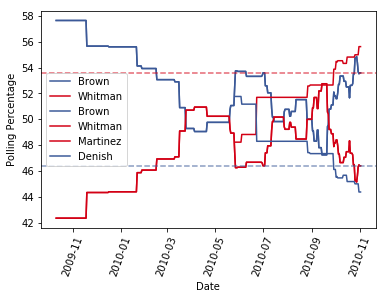

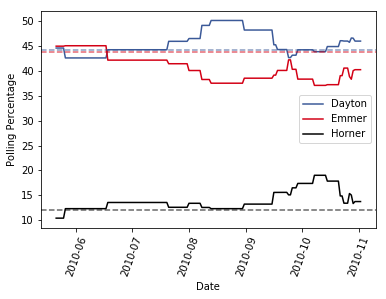

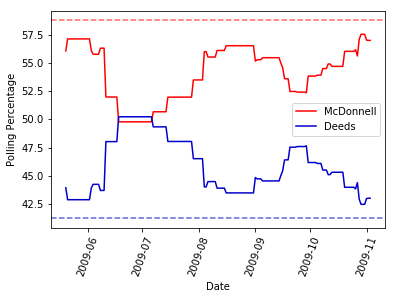

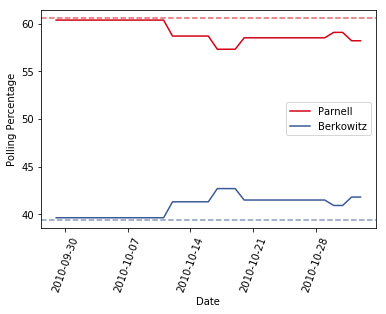

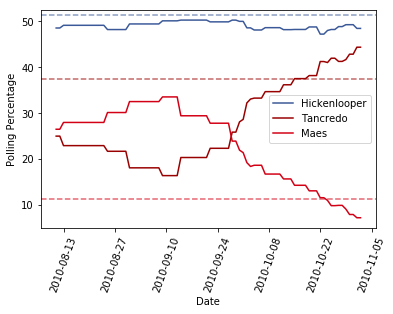

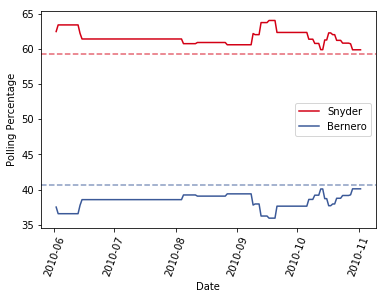

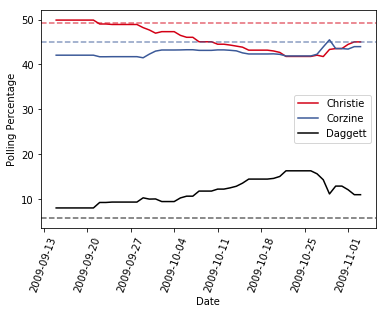

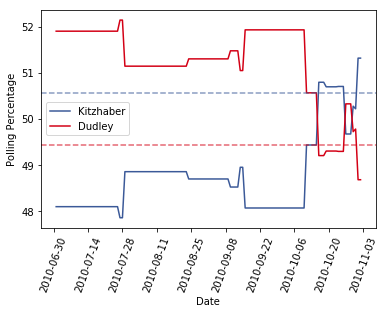

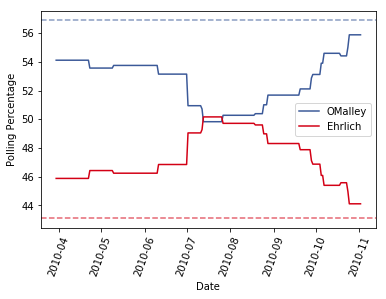

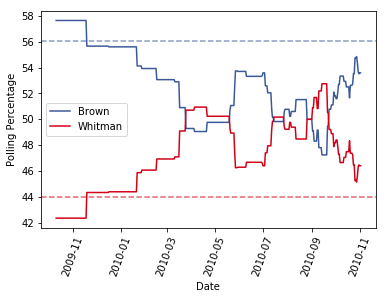

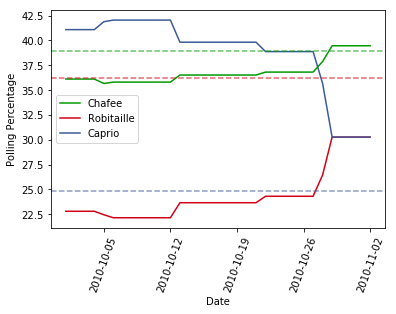

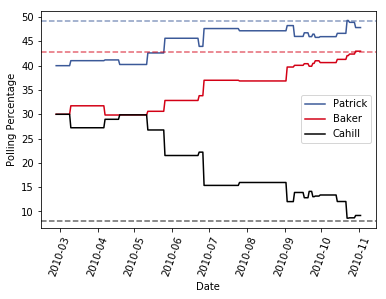

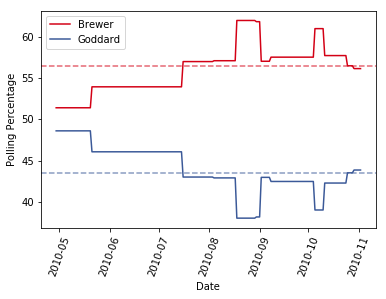

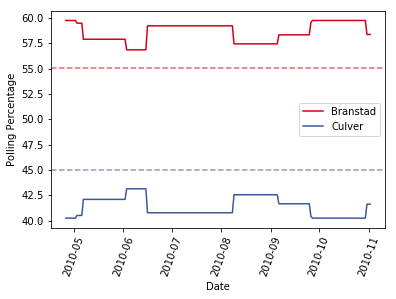

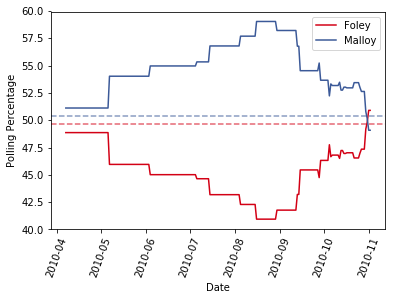

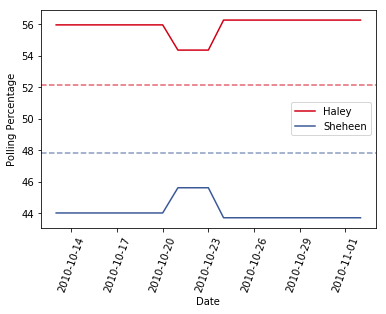

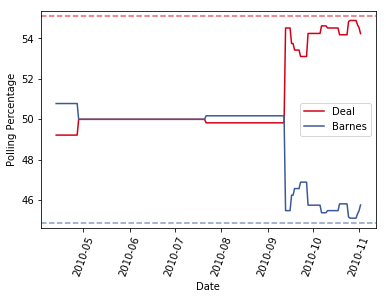

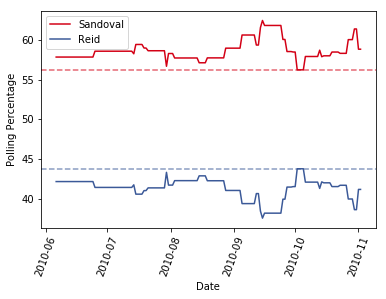

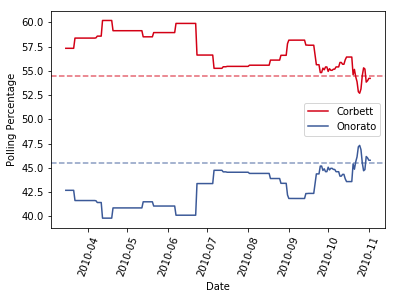

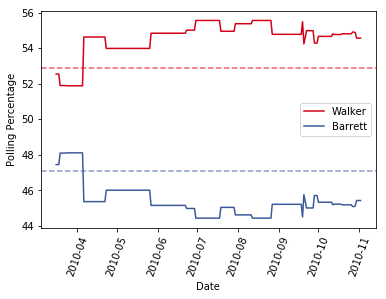

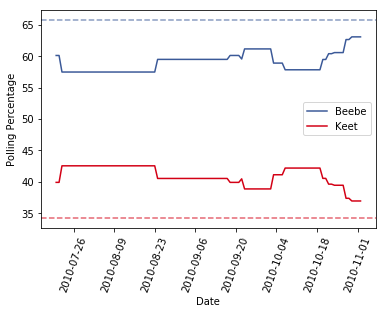

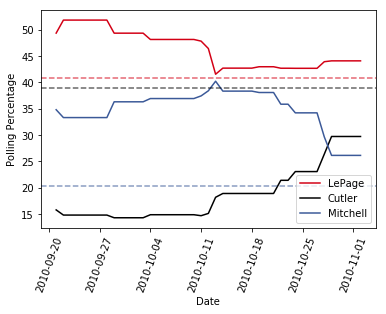

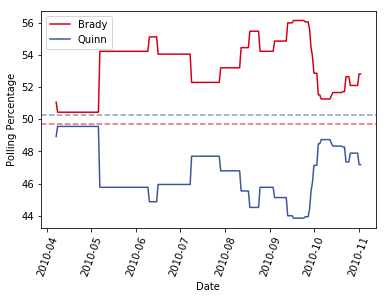

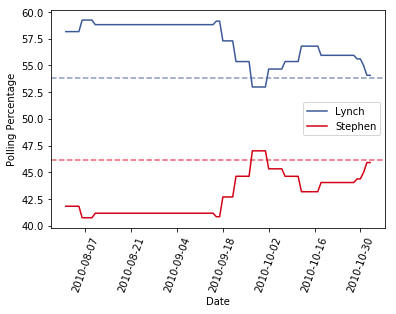

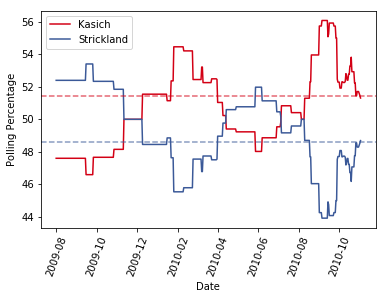

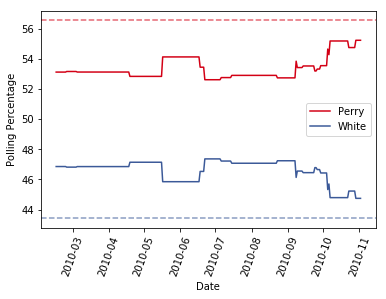

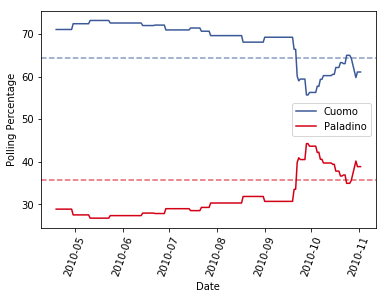

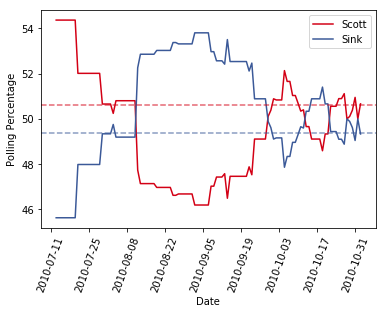

/Applications/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.resample() is now a deferred operation
You called dropna(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


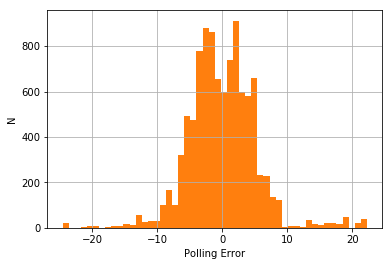

3411
<?xml version="1.0" encoding="UTF-8"?><chart><series><value xid='0'>1/30/2013</value><value xid='1'>1/31/2013</value><value xid='2'>2/01/2013</value><value xid='3'>2/02/2013</value><value xid='4'>2/03/2013</value><value xid='5'>2/04/2013</value><value xid='6'>2/05/2013</value><value xid='7'>2/06/2013</value><value xid='8'>2/07/2013</value><value xid='9'>2/08/2013</value><value xid='10'>2/09/2013</value><value xid='11'>2/10/2013</value><value xid='12'>2/11/2013</value><value xid='13'>2/12/2013</value><value xid='14'>2/13/2013</value><value xid='15'>2/14/2013</value><value xid='16'>2/15/2013</value><value xid='17'>2/16/2013</value><value xid='18'>2/17/2013</value><value xid='19'>2/18/2013</value><value xid='20'>2/19/2013</value><value xid='21'>2/20/2013</value><value xid='22'>2/21/2013</value><value xid='23'>2/22/2013</value><value xid='24'>2/23/2013</value><value xid='25'>2/24/2013</value><value xid='26'>2/25/2013</value><value xid='27'>2/26/2013</value><value xid='28'>2/27/2013</v

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


{'Buono': 0.0213, 'Christie': 0.9787}
